<a href="https://colab.research.google.com/github/oddy04/miguelperez-dataportfolio/blob/main/telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/churn-bigml-80.csv')

print("---dimension del dataset---")
print(f"filas:{df.shape[0]}, columnas:{df.shape[1]}")


print("\n--- 5 primeras filas---")
print(df.head())


print("\n---tipos de datos y valores nulos---")
df.info()

---dimension del dataset---
filas:2666, columnas:20

--- 5 primeras filas---
  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07   

In [2]:
# 2.1. Identificar columnas de tipo 'object' que necesitan codificación
categorical_cols = df.select_dtypes(include=['object']).columns

# 2.2. Aplicar One-Hot Encoding
# Usamos 'drop_first=True' para evitar la multicolinealidad
df_model = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 2.3. Convertir la columna Churn (Booleana) a entero (0 o 1)
df_model['Churn'] = df_model['Churn'].astype(int)

print(f"\nDimensiones finales del dataset: {df_model.shape}")
print("\n--- Primeras filas del dataset listo para ML ---")
print(df_model.head())


Dimensiones finales del dataset: (2666, 69)

--- Primeras filas del dataset listo para ML ---
   Account length  Area code  Number vmail messages  Total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   

In [3]:
columns_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
df = df.drop(columns_to_drop, axis=1)

print(f"Dimensiones después de la reducción: {df.shape}")
print("\n--- Columnas restantes ---")
print(df.columns)

Dimensiones después de la reducción: (2666, 14)

--- Columnas restantes ---
Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'Churn'],
      dtype='object')


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_model = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_model['churn']= df_model['Churn'].astype(int)
x=df_model.drop('churn', axis=1)
y=df_model['Churn']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print("---division de datos comletada---")
print(f"tamaño del conjunto de entrenamiento : {X_train.shape[0]} filas")

scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

print("escalado (estandarizacion) completo")

model= RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(x_train_scaled, y_train)

print("modelo random forest entrenado con exito!!")



y_pred= model.predict(X_test_scaled)

print("\n"+ "="*40)
print("---METRICAS DE EVALUACION FINAL---")
print("="*40)


print(f"precision general (accuracy):{accuracy_score(y_test, y_pred):.4f}")

print("\n---reporte de clasificacion(detalle por clase)---")
print(classification_report(y_test, y_pred))

---division de datos comletada---
tamaño del conjunto de entrenamiento : 1866 filas
escalado (estandarizacion) completo
modelo random forest entrenado con exito!!

---METRICAS DE EVALUACION FINAL---
precision general (accuracy):1.0000

---reporte de clasificacion(detalle por clase)---
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       684
        True       1.00      1.00      1.00       116

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800




---10 caracteristicas mas importantes---
                   Feature  Importance
11                   Churn    0.709376
2        Total day minutes    0.080264
10  Customer service calls    0.059130
12  International plan_Yes    0.046256
8       Total intl minutes    0.015501
4        Total eve minutes    0.015167
6      Total night minutes    0.013398
1    Number vmail messages    0.010626
9         Total intl calls    0.010026
13     Voice mail plan_Yes    0.009170


/tmp/ipython-input-3355891938.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',data=feature_importance_df.head(10),palette="viridis")


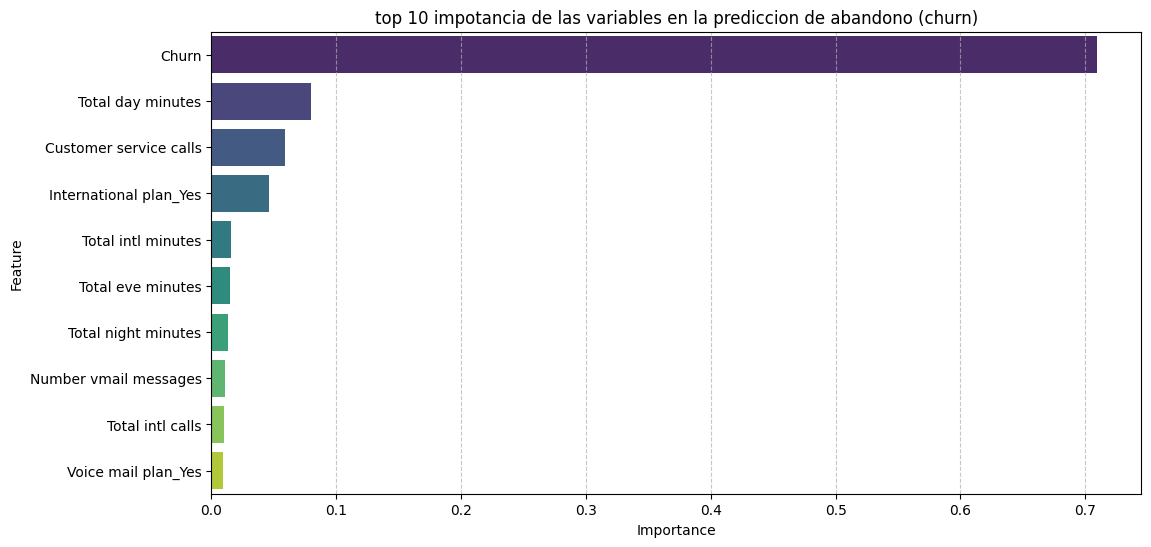

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = model.feature_importances_
feature_names= x.columns
feature_importance_df= pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
    }).sort_values('Importance', ascending=False)

print("\n---10 caracteristicas mas importantes---")
print(feature_importance_df.head(10))
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature',data=feature_importance_df.head(10),palette="viridis")
plt.title('top 10 impotancia de las variables en la prediccion de abandono (churn)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()